# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: Mzwandile Stuurman
### Github:   link https://github.com/mzwandile-stuurman/insurance_claims

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
# The data is an xlx file of insurance claims. The data can be found in Exloper AI github data repo


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
#Please use code cells to code in and do not forget to comment your code.

dataset = pd.read_csv('insurance_claims.csv')
dataset.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [3]:
# Check for possible null values and  different datatypes
# The data has 40 columns with 1000 rows, all data types and column name are shown below.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# check the exact columns with null values
dataset.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [3]:
# drop -C39 because all values are Null
dataset = dataset.drop(columns='_c39',axis=1)
dataset 


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [6]:
dataset['authorities_contacted'].fillna('Other')

0      Police
1      Police
2      Police
3      Police
4       Other
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [79]:
# remove un-important columns for modeling
dataset['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [30]:
# check data distribution with 5 number summary

describe = dataset.describe()
describe


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
# check for possible outliers
# The curtosis indicate that our values has a lot of outliers, but it is dificult to be sure with out a visualization.
kurt = dataset.kurtosis(numeric_only=True).sort_values(ascending=True)
kurt

bodily_injuries               -1.513178
number_of_vehicles_involved   -1.500467
policy_deductable             -1.376943
witnesses                     -1.343629
capital-loss                  -1.313875
capital-gains                 -1.276704
incident_hour_of_the_day      -1.192940
insured_zip                   -1.190711
auto_year                     -1.171868
policy_number                 -1.132638
injury_claim                  -0.763087
months_as_customer            -0.485428
total_claim_amount            -0.454081
vehicle_claim                 -0.446573
property_claim                -0.376386
age                           -0.260255
policy_annual_premium          0.073889
umbrella_limit                 1.792077
dtype: float64

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


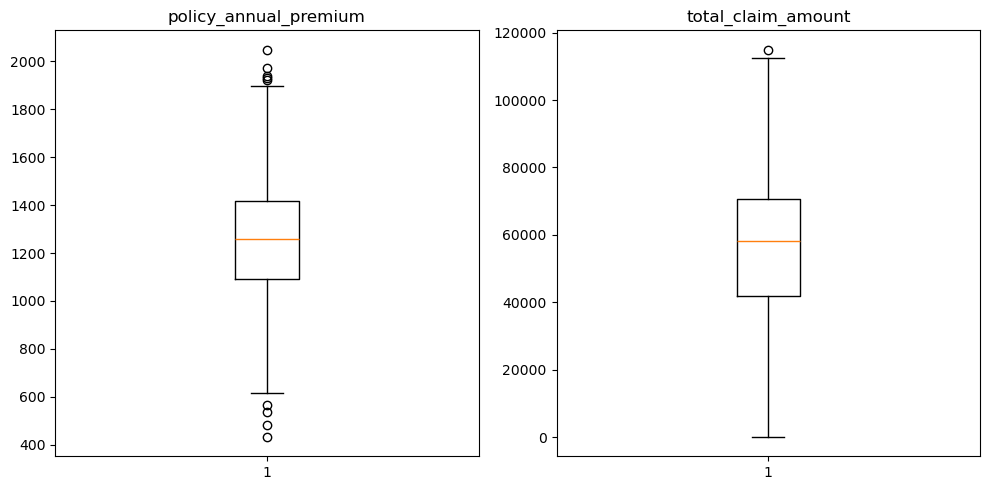

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
# Plot important financial data
# Set the figure size
col_list = ['policy_annual_premium','total_claim_amount', 'umbrella_limit']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first boxplot
axes[0].boxplot(dataset[col_list[0]])
axes[0].set_title(col_list[0])

# Plot the second boxplot
axes[1].boxplot(dataset[col_list[1]])
axes[1].set_title(col_list[1])


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()


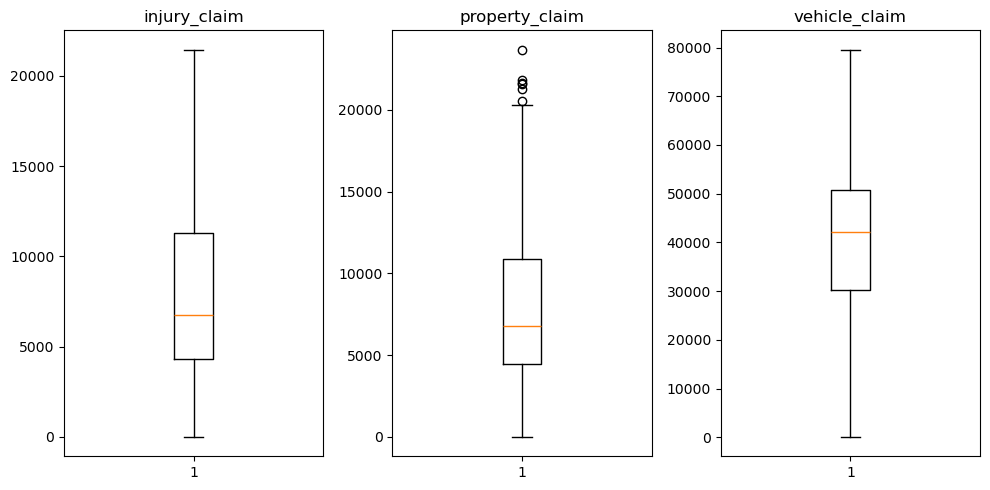

In [44]:
col_list = ['injury_claim','property_claim', 'vehicle_claim']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first boxplot
axes[0].boxplot(dataset[col_list[0]])
axes[0].set_title(col_list[0])

# Plot the second boxplot
axes[1].boxplot(dataset[col_list[1]])
axes[1].set_title(col_list[1])

axes[2].boxplot(dataset[col_list[2]])
axes[2].set_title(col_list[2])


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()


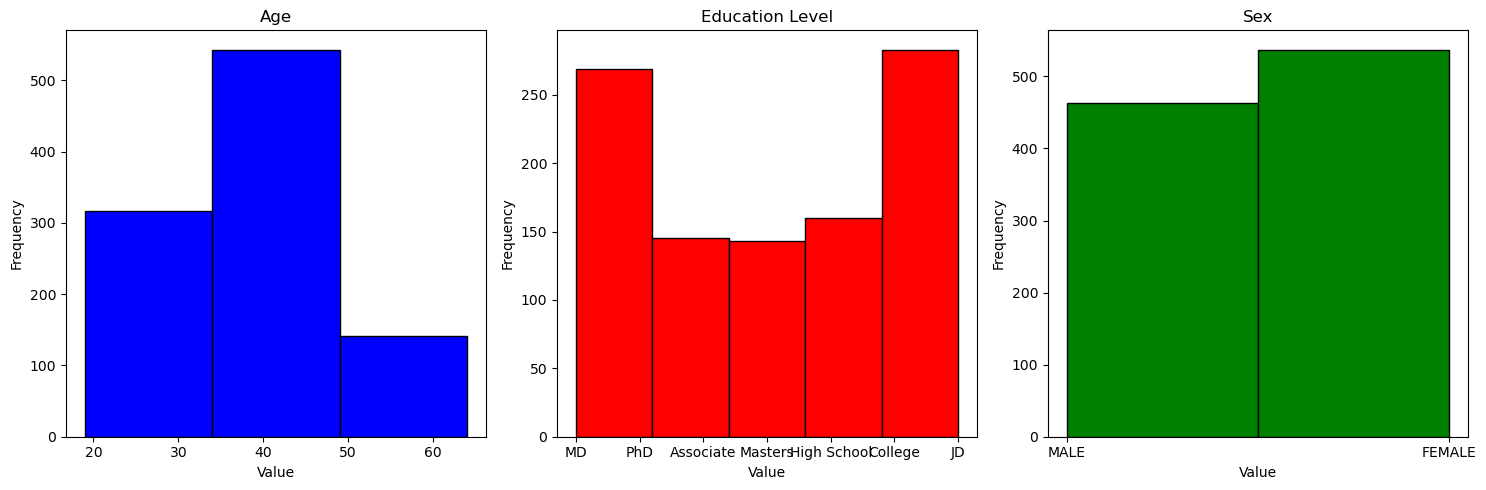

In [34]:
# Dustribution of personal attributes for customers
columns = ['age', 'insured_education_level', 'insured_sex']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(dataset[columns[0]], bins=3, color='blue', edgecolor='black')
axes[0].set_title('Age')
axes[1].hist(dataset[columns[1]], bins=5, color='red', edgecolor='black')
axes[1].set_title('Education Level')
axes[2].hist(dataset[columns[2]], bins=2, color='green', edgecolor='black')
axes[2].set_title('Sex')

for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


plt.show()

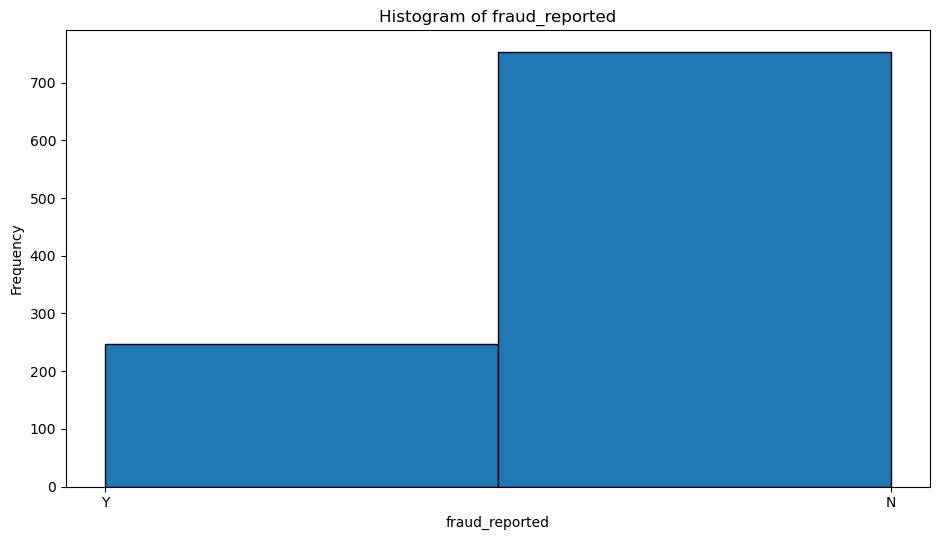

In [ ]:

# Fraud distribution
fraud = ['fraud_reported','insured_occupation']

# Plot the histogram
plt.hist(dataset[fraud[0]], bins=2, edgecolor='black')

# Add labels and title
plt.xlabel(fraud[0])
plt.ylabel('Frequency')
plt.title(f'Histogram of {fraud[0]}')

# Display the histogram
plt.show()



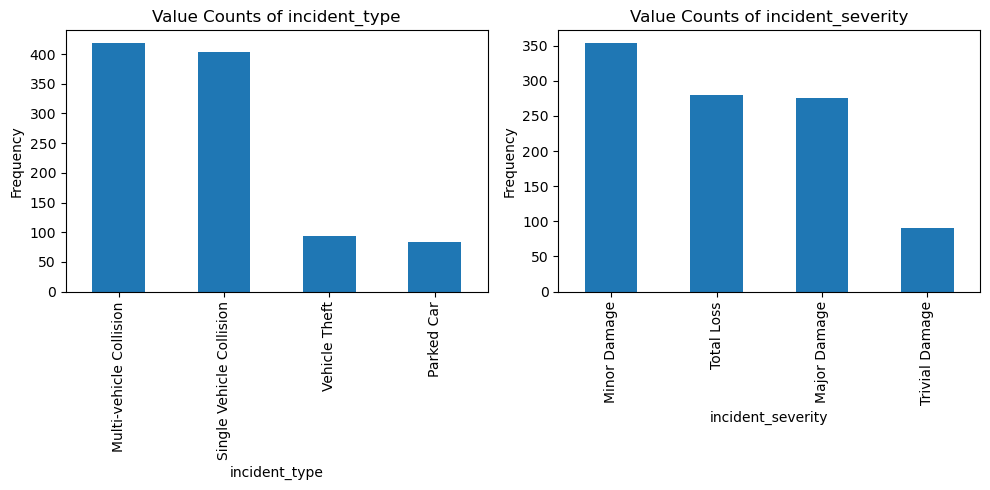

In [78]:

# Columns to plot
cols_to_plot = ['incident_type', 'incident_severity']

# Create subplots
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(10, 5))

# Ensure axes is treated as a list even if there's only one subplot
if len(cols_to_plot) == 1:
    axes = [axes]

# Loop through columns and create bar plots
for i, col in enumerate(cols_to_plot):
    value_counts = dataset[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], title=f'Value Counts of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [70]:
# correlation
corr_matrix = dataset.corr(method='pearson', numeric_only=True)
corr_matrix



,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


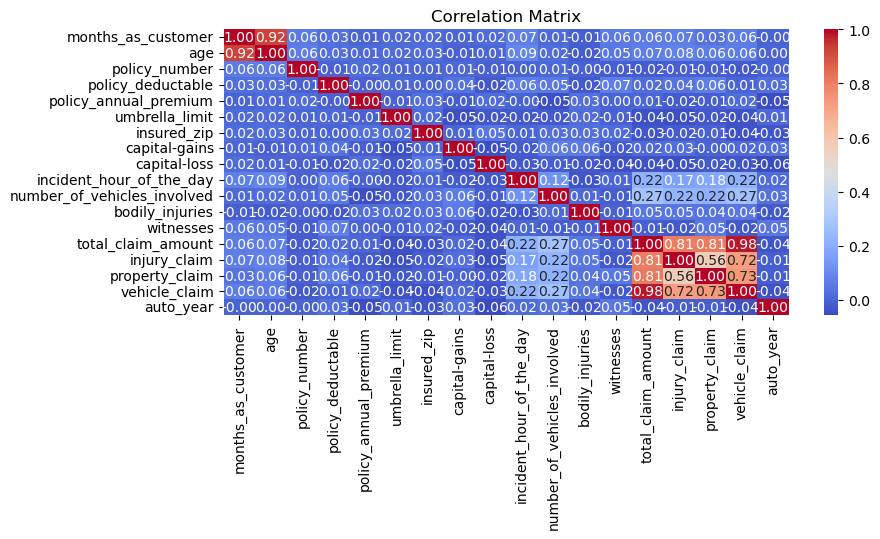

In [59]:
# correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


---
### Regression
---

> Multiple Linear Regression

In [4]:
# Catagorical varibales labeling
encoder = LabelEncoder()
reg_df = dataset.copy()


In [5]:
# remove colummns that dont make sense
reg_df.drop(columns=['fraud_reported','incident_location','incident_date','policy_bind_date'], axis=1, inplace=True)


In [6]:
# binary encoding for yes/no columns
binary_cols = ['property_damage', 'police_report_available']
for col in binary_cols:
    reg_df[col] = reg_df[col].map({'YES': 1, 'NO': 0, '?': -1})



In [7]:
# Frequency encoding  for column with high cardinality
high_card_cols = ['auto_model', 'incident_city', 'insured_occupation']

for col in high_card_cols:
    freq = reg_df[col].value_counts()
    reg_df[col] = reg_df[col].map(freq)



In [8]:
# One Hot encoding 
one_hot_cols = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'authorities_contacted',
    'incident_state',
    'auto_make'
]
reg_df = pd.get_dummies(reg_df, columns=one_hot_cols, drop_first=True)



In [9]:
# Label encoding
label_cols = ['insured_education_level', 'incident_severity']

# Apply LabelEncoder to each column
le_dict = {}  # Optional: store encoders if you want to inverse transform later

for col in label_cols:
    le = LabelEncoder()
    reg_df[col] = le.fit_transform(reg_df[col])
    le_dict[col] = le


In [10]:
# correlation and model structure
column_titles = [col for col in reg_df.columns if col!= 'policy_annual_premium'] + ['policy_annual_premium']
reg_df=reg_df.reindex(columns=column_titles)

In [11]:
reg_df.corr()



,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,insured_education_level,insured_occupation,capital-gains,capital-loss,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,policy_annual_premium
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.015498,0.017895,-0.000833,-0.002150,0.006399,0.020209,...,0.015478,-0.039476,0.016515,0.095613,-0.032650,0.041350,0.018059,-0.037225,0.031905,0.005018
age,0.922098,1.000000,0.059413,0.029188,0.018126,0.025604,0.000969,0.001485,-0.007075,0.007368,...,0.003279,-0.037517,0.028231,0.083643,-0.034264,0.041219,0.002485,-0.046058,0.030235,0.014404
policy_number,0.057555,0.059413,1.000000,-0.006738,0.008968,0.007083,-0.037264,0.001116,0.009802,-0.005669,...,-0.030922,0.005766,-0.023363,0.055455,-0.001706,-0.051616,0.021897,-0.006821,0.054201,0.022566
policy_deductable,0.026807,0.029188,-0.006738,1.000000,0.010870,0.004545,0.015217,-0.094105,0.035212,-0.023544,...,0.007642,-0.010615,0.025428,-0.038736,-0.000659,-0.056536,0.003737,0.003076,0.004884,-0.003245
umbrella_limit,0.015498,0.018126,0.008968,0.010870,1.000000,0.019671,-0.019357,0.013420,-0.047268,-0.024056,...,0.024813,-0.018252,0.031758,0.025500,-0.037152,-0.006549,-0.016181,-0.005240,0.022717,-0.006247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
auto_make_Saab,0.041350,0.041219,-0.051616,-0.056536,-0.006549,-0.022865,-0.019457,0.017007,-0.046626,0.003109,...,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,1.000000,-0.086957,-0.080902,-0.079652,0.076691
auto_make_Suburu,0.018059,0.002485,0.021897,0.003737,-0.016181,-0.014380,0.024075,-0.017050,0.027867,0.002480,...,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,-0.086957,1.000000,-0.080902,-0.079652,-0.038238
auto_make_Toyota,-0.037225,-0.046058,-0.006821,0.003076,-0.005240,-0.046011,0.028939,0.030402,0.051164,0.020379,...,-0.076419,-0.066187,-0.073520,-0.072337,-0.079798,-0.080902,-0.080902,1.000000,-0.074106,0.004869
auto_make_Volkswagen,0.031905,0.030235,0.054201,0.004884,0.022717,0.010214,0.045509,0.017239,-0.003333,-0.069678,...,-0.075238,-0.065165,-0.072384,-0.071219,-0.078565,-0.079652,-0.079652,-0.074106,1.000000,0.023443


In [ ]:

from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plot_corr(reg_df.corr(), xnames = reg_df.corr().columns, ax = ax)


In [12]:
# fitting the model 
from statsmodels.formula.api import ols
# rename column names for moddeling
reg_df.columns = reg_df.columns.str.replace('/', '_', regex=False)
reg_df.columns = reg_df.columns.str.replace('-', '_', regex=False)
reg_df.columns = reg_df.columns.str.replace(' ', '_')

# Model DataFrame with encoded column:

dfm = reg_df.copy()

# The dependent variable:
y_name = 'policy_annual_premium'

# The independent variable
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names)
print('Formula:\n\t {}'.format(formula_str))


Formula:
	 policy_annual_premium ~ months_as_customer + age + policy_number + policy_deductable + umbrella_limit + insured_zip + insured_education_level + insured_occupation + capital_gains + capital_loss + incident_severity + incident_city + incident_hour_of_the_day + number_of_vehicles_involved + property_damage + bodily_injuries + witnesses + police_report_available + total_claim_amount + injury_claim + property_claim + vehicle_claim + auto_model + auto_year + policy_state_IN + policy_state_OH + policy_csl_250_500 + policy_csl_500_1000 + insured_sex_MALE + insured_hobbies_basketball + insured_hobbies_board_games + insured_hobbies_bungie_jumping + insured_hobbies_camping + insured_hobbies_chess + insured_hobbies_cross_fit + insured_hobbies_dancing + insured_hobbies_exercise + insured_hobbies_golf + insured_hobbies_hiking + insured_hobbies_kayaking + insured_hobbies_movies + insured_hobbies_paintball + insured_hobbies_polo + insured_hobbies_reading + insured_hobbies_skydiving + insure

In [16]:
dfm.shape

(1000, 82)

In [13]:
# Fit the model using the model DataFrame
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
#print(fitted.summary())
# this model is not the best maybe ecreasing variables with variance might yeild a better model

In [14]:
#Selection by correlation
corrs = reg_df.corr()['policy_annual_premium'].sort_values(ascending=False)
corrs


policy_annual_premium                     1.000000
property_damage                           0.095359
auto_make_Saab                            0.076691
incident_type_Single_Vehicle_Collision    0.060460
auto_make_Jeep                            0.059603
                                            ...   
incident_city                            -0.047483
auto_year                                -0.049226
insured_occupation                       -0.053106
auto_make_Mercedes                       -0.067454
insured_hobbies_paintball                -0.083825
Name: policy_annual_premium, Length: 82, dtype: float64

In [15]:
# check p-values for each
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'policy_annual_premium']

for col in column_titles:
    p_val = round(pearsonr( reg_df[col], reg_df['policy_annual_premium'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]



,Correlation_Coefficient,P_Value
property_damage,0.095359,0.002539
insured_hobbies_paintball,-0.083825,0.007999
auto_make_Saab,0.076691,0.015278
auto_make_Mercedes,-0.067454,0.032937
incident_type_Single_Vehicle_Collision,0.060460,0.055968
auto_make_Jeep,0.059603,0.059547
incident_state_VA,0.053525,0.090705
insured_occupation,-0.053106,0.093263


In [16]:
# The dependent variable remains the same:
y_data = reg_df[y_name]  

# Model building – Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_corr = reg_df[X_names]
X_corr



,property_damage,auto_make_Saab,auto_make_Mercedes,insured_hobbies_paintball
0,1,True,False,False
1,-1,False,True,False
2,0,False,False,False
3,-1,False,False,False
4,0,False,False,False
...,...,...,...,...
995,1,False,False,True
996,1,False,False,False
997,-1,False,False,False
998,-1,False,False,False


In [17]:
# removing corlinearity
# Create the correlation matrix
corr = X_corr.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]



,property_damage,auto_make_Saab,auto_make_Mercedes,insured_hobbies_paintball
property_damage,1.0,NaN,NaN,NaN
auto_make_Saab,NaN,1.0,NaN,NaN
auto_make_Mercedes,NaN,NaN,1.0,NaN
insured_hobbies_paintball,NaN,NaN,NaN,1.0


In [18]:
# fit the model with these 4 features
# Let's take a new subset of our potential independent variables

# Create our new OLS formula based upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr)
print('Formula:\n\t{}'.format(formula_str))


Formula:
	policy_annual_premium ~ property_damage + auto_make_Saab + auto_make_Mercedes + insured_hobbies_paintball


In [20]:
# Fit the OLS model using the model DataFrame
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
#print(fitted.summary())


In [21]:
# variance threshold method

# Separate data into independent (X) and independent (y) variables
X_names = list(reg_df.columns)
X_names.remove(y_name)
X_data = reg_df[X_names]
y_data = reg_df[y_name]
y_data


0      1406.91
1      1197.22
2      1413.14
3      1415.74
4      1583.91
        ...   
995    1310.80
996    1436.79
997    1383.49
998    1356.92
999     766.19
Name: policy_annual_premium, Length: 1000, dtype: float64

In [26]:
X_data.shape

(1000, 81)

In [22]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)



In [23]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)


VarianceThreshold(threshold=0.03)

In [24]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()


,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,insured_education_level,insured_occupation,capital_gains,capital_loss,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0.684760,0.644444,0.468247,0.333333,0.090909,0.188769,0.666667,0.525,0.530348,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.475992,0.511111,0.269370,1.000000,0.545455,0.199478,0.666667,1.000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.279749,0.222222,0.653098,1.000000,0.545455,0.002766,1.000000,0.575,0.349254,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.534447,0.488889,0.141334,1.000000,0.636364,0.932699,1.000000,0.400,0.486567,0.438344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.475992,0.555556,0.296730,0.333333,0.636364,0.946264,0.000000,0.575,0.656716,0.585959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
X_new.shape


(1000, 79)

In [25]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))


Formula:
	policy_annual_premium ~ months_as_customer + age + policy_number + policy_deductable + umbrella_limit + insured_zip + insured_education_level + insured_occupation + capital_gains + capital_loss + incident_severity + incident_city + incident_hour_of_the_day + number_of_vehicles_involved + property_damage + bodily_injuries + witnesses + police_report_available + total_claim_amount + injury_claim + property_claim + vehicle_claim + auto_model + auto_year + policy_state_IN + policy_state_OH + policy_csl_250_500 + policy_csl_500_1000 + insured_sex_MALE + insured_hobbies_basketball + insured_hobbies_board_games + insured_hobbies_bungie_jumping + insured_hobbies_camping + insured_hobbies_chess + insured_hobbies_cross_fit + insured_hobbies_dancing + insured_hobbies_exercise + insured_hobbies_golf + insured_hobbies_hiking + insured_hobbies_kayaking + insured_hobbies_movies + insured_hobbies_paintball + insured_hobbies_polo + insured_hobbies_reading + insured_hobbies_skydiving + insured

In [26]:
# Fit the model using the model DataFrame
model = ols(formula=formula_str, data=reg_df)
fitted = model.fit()

#print(fitted.summary())


In [27]:
# Train-test split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)


In [28]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [29]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr.columns]
X_corr_test = X_test[X_corr.columns]


In [30]:
# Instantiate the models
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()


In [31]:
# Fit the models
lm.fit(X_train, y_train)
lm_corr.fit(X_corr_train,y_train)
lm_var.fit(X_var_train,y_train)


LinearRegression()

In [ ]:
print(f"Original model intercept: {lm.intercept_}. \nOriginal model slope: {lm.coef_[0]}\n")
print(f"Correlation model intercept: {lm_corr.intercept_}\nCorrelation model slope: {lm_corr.coef_[0]}\n")
print(f"Varrience model intercept: {lm_var.intercept_}\nVarrience model slope: {lm_var.coef_[0]}")


Original model intercept: 1612.525432743235. 
Original model slope: -0.10490433933581812

Correlation model intercept: 1266.2007899341354
Correlation model slope: 30.75306942360855

Varrience model intercept: 1596.5191878319554
Varrience model slope: -0.10416738433290447


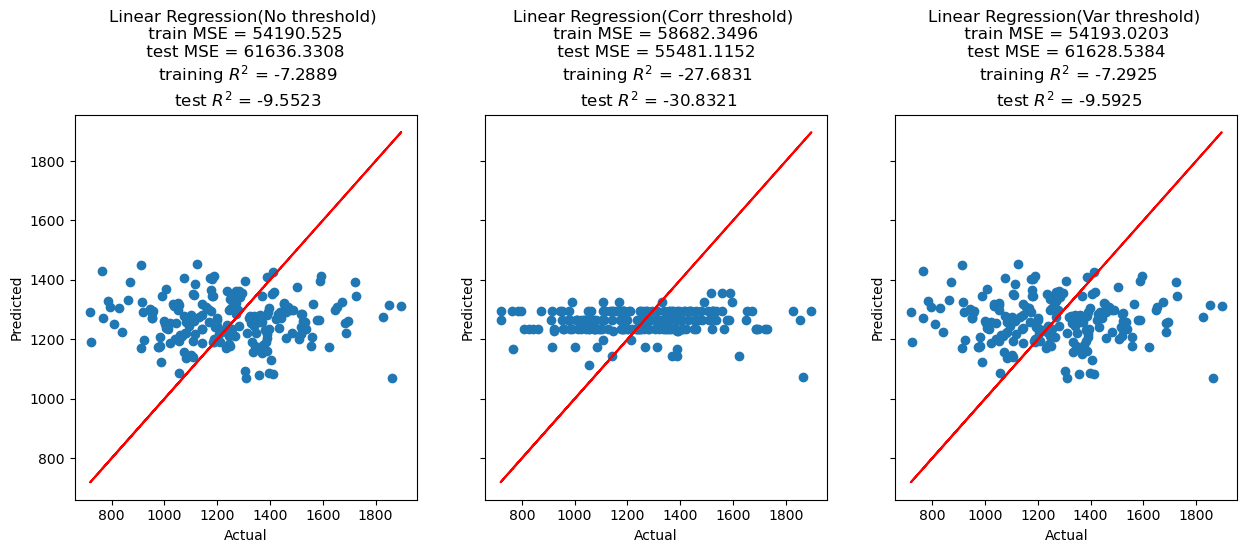

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold – linear regression with all predictive variables
# Corr threshold – linear regression with correlation-thresholded predictive variables
# Var threshold – linear regression with variance-thresholded predictive variables

# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

    

In [42]:
y_train

0      1406.91
1      1197.22
2      1413.14
3      1415.74
4      1583.91
        ...   
795    1616.65
796    1935.85
797     855.14
798    1568.47
799    1550.53
Name: policy_annual_premium, Length: 800, dtype: float64

#### Other Regression Models


> Decision Tree Regression

In [32]:
# Initialize and apply MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [33]:
# a generic function for different regression models
def train_and_evaluate_model(model):
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return model, r2, mse


In [ ]:

# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_mse = train_and_evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=4))
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")


Decision tree regression - R²: -0.06611310006551441, MSE: 58490.691896299795


> Random Forest Regression


In [47]:
forest_model, forest_r2, forest_mse = train_and_evaluate_model(RandomForestRegressor(random_state=42, max_depth=4))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")


Random Forest Regression - R²: -0.0288267021818871, MSE: 56445.02975182369


> Stacking ensemble method

In [ ]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', lm),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()


In [49]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_mse = train_and_evaluate_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5))
print(f"Stacking Regression - R²: {stacking_r2}, MSE: {stacking_mse}")


Stacking Regression - R²: -0.0027057304030937424, MSE: 55011.94191878659


---
### **Classification**
---


> Logistic Regression


In [34]:
class_df = reg_df.copy()
class_df.head()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,insured_education_level,insured_occupation,capital_gains,capital_loss,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,policy_annual_premium
0,328,48,521585,1000,0,466132,4,74,53300,0,...,False,False,False,False,False,True,False,False,False,1406.91
1,228,42,342868,2000,5000000,468176,4,93,0,0,...,False,False,False,True,False,False,False,False,False,1197.22
2,134,29,687698,2000,5000000,430632,6,76,35100,0,...,False,False,False,False,False,False,False,False,False,1413.14
3,256,41,227811,2000,6000000,608117,6,69,48900,-62400,...,False,False,False,False,False,False,False,False,False,1415.74
4,228,44,367455,1000,6000000,610706,0,76,66000,-46000,...,False,False,False,False,False,False,False,False,False,1583.91


In [35]:
# get target and predictor variables
class_y = dataset['fraud_reported'].map({'Y': 1, 'N': 0})
X_class = class_df


In [36]:
#split the data for testing and training

class_X_train, class_X_test, class_y_train, class_y_test = train_test_split(X_class, class_y, test_size=0.3, random_state=42)


In [37]:
# scale the trained data set
scaler = StandardScaler()
class_X_train_scaled = scaler.fit_transform(class_X_train)
class_X_test_scaled = scaler.transform(class_X_test)  


In [38]:
# create an instance of the model
lr = LogisticRegression(max_iter=1000)

In [39]:
#fit the model
lr.fit(class_X_train_scaled, class_y_train)

LogisticRegression(max_iter=1000)

In [40]:
# co-efficient at 0
lr.intercept_[0]


-2.4816453056053316

In [41]:
# view all co-efficients
coeff_df = pd.DataFrame(lr.coef_.T, X_class.columns,columns=['Coefficient'])
coeff_df



,Coefficient
months_as_customer,-0.016491
age,-0.223220
policy_number,-0.201446
policy_deductable,0.249503
umbrella_limit,0.472946
...,...
auto_make_Saab,0.277249
auto_make_Suburu,0.108973
auto_make_Toyota,-0.092304
auto_make_Volkswagen,0.398901


In [42]:
# predictions
pred_lr = lr.predict(class_X_test_scaled)
pred_lr


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], d

In [43]:

print(confusion_matrix(class_y_test,pred_lr))
print(classification_report(class_y_test,pred_lr))

[[189  31]
 [ 50  30]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       220
           1       0.49      0.38      0.43        80

    accuracy                           0.73       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.71      0.73      0.72       300



In [ ]:
# There might be overfitting because data imbalance between Yes and No
# Upscale Yes to be eqaul to No and then fit again then compare

In [ ]:
# feature selection by variance thresholding
# Import the var thresh model and choose a threshold

selector = VarianceThreshold(threshold=0.02)

# Transform (i.e.: run selection on) the training data
X_train_vt = selector.fit_transform(class_X_train)
X_train_vt.shape


(700, 82)

In [ ]:
# Best K features
# lm instance for k-best
lm_kbest = LogisticRegression()


In [51]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=65)

# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(class_X_train_scaled, class_y_train)


In [ ]:
X_train_kbest.shape


(700, 65)

In [ ]:
# Fit model to the transformed data
lm_kbest.fit(X_train_kbest, class_y_train)


LogisticRegression()

In [ ]:
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(class_X_test_scaled)

# Generate predictions from var thresh model
pred_lm_kbest = lm_kbest.predict(X_test_kbest)


In [63]:
# Sequential forwading
# Import the selector module and the accuracy_score module to computer performance
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lm_sfs = LogisticRegression()
# We then build our forward feature selector
sfs = sfs(lm_sfs, k_features=40, forward=True, scoring='f1', cv=10)



In [64]:
# fit Sequential forwading
sfs = sfs.fit(class_X_train_scaled, class_y_train)


In [66]:
# Extract the feature names for the optimal number using the dictionary provided by the subsets_ method
columns = list(sfs.subsets_[40]['feature_idx'])

In [ ]:
#Extraact the best 40
X_train_sfs = class_X_train_scaled[:, columns]
X_test_sfs = class_X_test_scaled[:, columns]


In [ ]:
# train model on best 40
lm_sfs.fit(X_train_sfs, class_y_train)


LogisticRegression()

In [ ]:
# predictions
pred_lm_sfs = lm_sfs.predict(X_test_sfs)


In [ ]:
print('Full Model')
print(classification_report(class_y_test, pred_lr, target_names=['No', 'Yes']))

print('KBest Model')
print(classification_report(class_y_test, pred_lm_kbest, target_names=['No', 'Yes']))

print('SFS Model')
print(classification_report(class_y_test, pred_lm_sfs, target_names=['No', 'Yes']))



Full Model
              precision    recall  f1-score   support

          No       0.79      0.86      0.82       220
         Yes       0.49      0.38      0.43        80

    accuracy                           0.73       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.71      0.73      0.72       300

KBest Model
              precision    recall  f1-score   support

          No       0.79      0.87      0.83       220
         Yes       0.51      0.36      0.42        80

    accuracy                           0.74       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.72      0.74      0.72       300

SFS Model
              precision    recall  f1-score   support

          No       0.81      0.90      0.85       220
         Yes       0.61      0.41      0.49        80

    accuracy                           0.77       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.76      0.77      0.

In [ ]:
# The SFS Model is the most accurate one
# We will perform model hyper parameter tuning on it

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [58]:
#Please use code cells to code in and do not forget to comment your code.
dataset['insured_sex'].value_counts()

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
